In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


In [2]:
import matplotlib.pyplot as plt
from numpy import random

In [3]:

import math
import scipy.stats as st
from statsmodels.stats import multitest
import pandas as pd

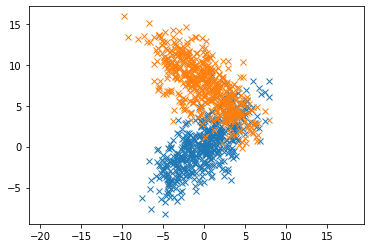

In [24]:
N_train = 500

X_train_cl1 = random.multivariate_normal([0, 0], [[10, 7.5], [7.5, 10]], size = N_train)
X_train_cl2 = random.multivariate_normal([0, 7.5], [[10, -7], [-7, 10]], size = N_train)
y_train_cl1 = np.zeros(N_train)
y_train_cl2 = np.ones(N_train)

plt.plot(X_train_cl1[:, 0], X_train_cl1[:, 1], 'x')
plt.plot(X_train_cl2[:, 0], X_train_cl2[:, 1], 'x')
plt.axis('equal')
plt.show()

In [25]:
X_train = np.concatenate((X_train_cl1, X_train_cl2), axis=0)
y_train = np.concatenate((y_train_cl1, y_train_cl2), axis=0)

random_state = np.random.RandomState(0)
n_samples = 2*N_train
n_features = 2

classifier = svm.SVC(kernel="linear", probability=True, random_state=random_state)

classifier.fit(X_train, y_train)

SVC(kernel='linear', probability=True,
    random_state=RandomState(MT19937) at 0x17C8C798EB8)

In [26]:
N_valid1 = 500

X_valid1_cl1 = random.multivariate_normal([0, 0], [[10, 7.5], [7.5, 10]], size = N_valid1)
X_valid1_cl2 = random.multivariate_normal([0, 7.5], [[10, -7], [-7, 10]], size = N_valid1)
y_valid1_cl1 = np.zeros(N_valid1)
y_valid1_cl2 = np.ones(N_valid1)

X_valid1 = np.concatenate((X_valid1_cl1, X_valid1_cl2), axis=0)
y_valid1 = np.concatenate((y_valid1_cl1, y_valid1_cl2), axis=0)      

y_score1 = classifier.decision_function(X_valid1)

fpr_valid1, tpr_valid1, _ = roc_curve(y_valid1, y_score1)
roc_auc_valid1 = auc(fpr_valid1, tpr_valid1)

In [27]:
N_valid2 = 25

X_valid2_cl1 = random.multivariate_normal([0, 0], [[10, 7.5], [7.5, 10]], size = N_valid2)
X_valid2_cl2 = random.multivariate_normal([0, 7.5], [[10, -7], [-7, 10]], size = N_valid2)
y_valid2_cl1 = np.zeros(N_valid2)
y_valid2_cl2 = np.ones(N_valid2)

X_valid2 = np.concatenate((X_valid2_cl1, X_valid2_cl2), axis=0)
y_valid2 = np.concatenate((y_valid2_cl1, y_valid2_cl2), axis=0)  

y_score2 = classifier.decision_function(X_valid2)

fpr_valid2, tpr_valid2, _ = roc_curve(y_valid2, y_score2)
roc_auc_valid2 = auc(fpr_valid2, tpr_valid2)

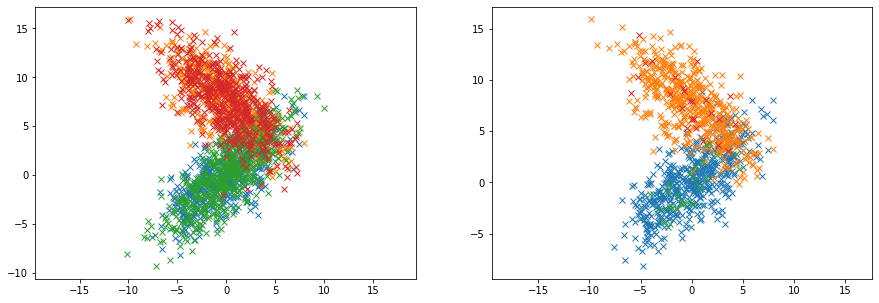

In [28]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(X_train_cl1[:, 0], X_train_cl1[:, 1], 'x')
plt.plot(X_train_cl2[:, 0], X_train_cl2[:, 1], 'x')
plt.plot(X_valid1_cl1[:, 0], X_valid1_cl1[:, 1], 'x')
plt.plot(X_valid1_cl2[:, 0], X_valid1_cl2[:, 1], 'x')
plt.axis('equal')
plt.subplot(1,2,2)
plt.plot(X_train_cl1[:, 0], X_train_cl1[:, 1], 'x')
plt.plot(X_train_cl2[:, 0], X_train_cl2[:, 1], 'x')
plt.plot(X_valid2_cl1[:, 0], X_valid2_cl1[:, 1], 'x')
plt.plot(X_valid2_cl2[:, 0], X_valid2_cl2[:, 1], 'x')
plt.axis('equal')
plt.show()

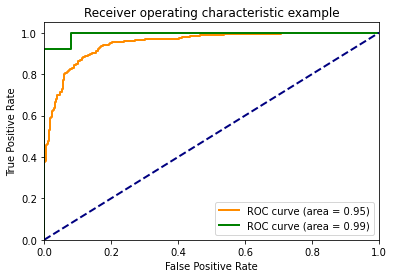

In [29]:
plt.figure()
lw = 2
plt.plot(
    fpr_valid1,
    tpr_valid1,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc_valid1,
)

plt.plot(
    fpr_valid2,
    tpr_valid2,
    color="green",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc_valid2,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [30]:
def hs(x, y):
    output = 0
    if x>y:
        output = 1
    elif x==y:
        output = 0.5
    return output

def theta(X, Y):
    theta = 0
    len_X = len(X)
    len_Y = len(Y)
    for i in range (0, len_X):
        for j in range (0, len_Y):
            theta += hs(X[i], Y[j])
    theta /= (len_X*len_Y)
    return theta

def V_10(X, Y):
    V_10 = []
    len_X = len(X)
    len_Y = len(Y)
    for i in range (0, len_X):
        v = 0
        for j in range (0, len_Y):
            v += hs(X[i], Y[j])
        v /= len(Y)
        V_10.append(v)
    return V_10

def V_01(X, Y):
    V_01 = []
    len_X = len(X)
    len_Y = len(Y)
    for i in range (0, len_Y):
        v = 0
        for j in range (0, len_X):
            v += hs(X[i], Y[j])
        v /= len(X)
        V_01.append(v) 
    return V_01

def pDelong(scores_A, scores_B, labels_A, labels_B):

    X_A = np.array(scores_A)[np.where(np.array(labels_A) == 1)]
    Y_A = np.array(scores_A)[np.where(np.array(labels_A) == 0)]

    X_B = np.array(scores_B)[np.where(np.array(labels_B) == 1)]
    Y_B = np.array(scores_B)[np.where(np.array(labels_B) == 0)]

    theta_A = theta(X_A, Y_A)
    theta_B = theta(X_B, Y_B)

    V_10_A = V_10(X_A, Y_A)
    V_01_A = V_01(X_A, Y_A)
    V_10_B = V_10(X_B, Y_B)
    V_01_B = V_01(X_B, Y_B)

    S_10 = np.zeros((2, 2))
    S_01 = np.zeros((2, 2))
    
    
    for i in range (0, len(X_A)):
        S_10[0,0] += (V_10_A[i] - theta_A)*(V_10_A[i] - theta_A)
    for i in range (0, len(X_A)):
        S_10[0,1] += (V_10_A[i] - theta_A)*(V_10_B[i] - theta_B)
    for i in range (0, len(X_A)):
        S_10[1,0] += (V_10_B[i] - theta_B)*(V_10_A[i] - theta_A)
    for i in range (0, len(X_A)):
        S_10[1,1] += (V_10_B[i] - theta_B)*(V_10_B[i] - theta_B)

    S_10 /= (len(X_A)-1)

    for i in range (0, len(Y_A)):
        S_01[0,0] += (V_01_A[i] - theta_A)*(V_01_A[i] - theta_A)
    for i in range (0, len(Y_A)):
        S_01[0,1] += (V_01_A[i] - theta_A)*(V_01_B[i] - theta_B)
    for i in range (0, len(Y_A)):
        S_01[1,0] += (V_01_B[i] - theta_B)*(V_01_A[i] - theta_A)
    for i in range (0, len(Y_A)):
        S_01[1,1] += (V_01_B[i] - theta_B)*(V_01_B[i] - theta_B)

    S_01 /= (len(Y_A)-1)

    S = S_10/len(X_A) + S_01/len(Y_A)

    if S[0,0]+S[1,1]-S[0,1]-S[1,0] > 0:
        Z = (theta_A-theta_B)/math.sqrt(S[0,0]+S[1,1]-S[0,1]-S[1,0])
        p = st.norm.sf(abs(Z))*2
    else:
        if theta_A==theta_B:
            p = 1
        else:
            p = 0
    return p, theta_A, theta_B 

In [80]:
p, theta_valid1, theta_valid2 = pDelong(y_score2, y_score1, y_valid2, y_valid1)
print (p)

0.31878780546225716


In [79]:
def kernel_psi(score_cl1, score_cl2):
    psi = 0
    if score_cl1<score_cl2:
        psi = 1
    if score_cl1==score_cl2:
        psi = 0.5
    if score_cl1>score_cl2:
        psi = 0
    return psi

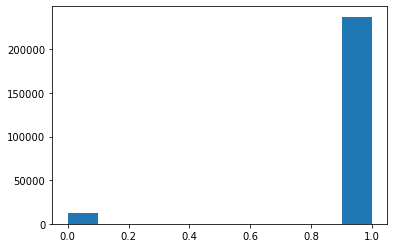

0.950192


In [75]:
y_valid1_score1_cl1 = np.array([y_valid1, y_score1])[:, np.where(y_valid1 == 0)]
y_valid1_score1_cl2 = np.array([y_valid1, y_score1])[:, np.where(y_valid1 == 1)]

m_valid1 = y_valid1_score1_cl1.shape[2]
n_valid1 = y_valid1_score1_cl2.shape[2]

psis_valid1 = []

for i in range (0, m_valid1):
    for j in range (0, n_valid1):
        psis_valid1.append(kernel_psi(y_valid1_score1_cl1[1][0][i], y_valid1_score1_cl2[1][0][j]))
        
plt.hist(psis_valid1)
plt.show()

rocaucemp_valid1 = np.sum(psis_valid1)/(m_valid1*n_valid1)

print (rocaucemp_valid1)

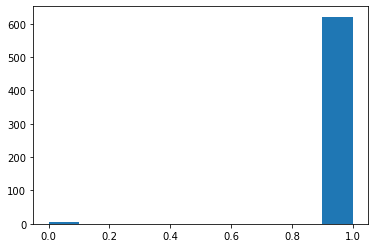

0.9936


In [81]:
y_valid2_score2_cl1 = np.array([y_valid2, y_score2])[:, np.where(y_valid2 == 0)]
y_valid2_score2_cl2 = np.array([y_valid2, y_score2])[:, np.where(y_valid2 == 1)]

m_valid2 = y_valid2_score2_cl1.shape[2]
n_valid2 = y_valid2_score2_cl2.shape[2]

psis_valid2 = []

for i in range (0, m_valid2):
    for j in range (0, n_valid2):
        psis_valid2.append(kernel_psi(y_valid2_score2_cl1[1][0][i], y_valid2_score2_cl2[1][0][j]))
        
plt.hist(psis_valid2)
plt.show()

rocaucemp_valid2 = np.sum(psis_valid2)/(m_valid2*n_valid2)

print (rocaucemp_valid2)

C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


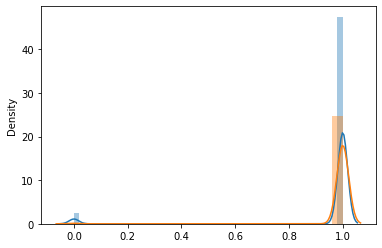

In [97]:
import seaborn as sns

sns.distplot(pd.Series(psis_valid1),  kde=True, norm_hist=True)
sns.distplot(pd.Series(psis_valid2),  kde=True, norm_hist=True)
plt.show()

